# S&P 500 가격 데이터 수집과 수익률 분석

<img src="https://i.imgur.com/tdpkZmM.png" >

###  2019 FinanceData.KR

## FinanceDataReader
https://financedata.github.io/FinanceDataReader/

In [1]:
## FinanceDataReader 설치 (for 구글 Colab)

!pip install -q finance-datareader

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (14,8)
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True
plt.rcParams['axes.axisbelow'] = True

# S&P500 종목 리스트

In [3]:
# S&P500 종목 리스트
import FinanceDataReader as fdr

sp500 = fdr.StockListing('S&P500')
sp500.head(10)

,Symbol,Name,Sector,Industry
0,MMM,3M Company,Industrials,Industrial Conglomerates
1,ABT,Abbott Laboratories,Health Care,Health Care Equipment
2,ABBV,AbbVie Inc.,Health Care,Pharmaceuticals
3,ABMD,ABIOMED Inc,Health Care,Health Care Equipment
4,ACN,Accenture plc,Information Technology,IT Consulting & Other Services
5,ATVI,Activision Blizzard,Communication Services,Interactive Home Entertainment
6,ADBE,Adobe Systems Inc,Information Technology,Application Software
7,AMD,Advanced Micro Devices Inc,Information Technology,Semiconductors
8,AAP,Advance Auto Parts,Consumer Discretionary,Automotive Retail
9,AES,AES Corp,Utilities,Independent Power Producers & Energy Traders


In [4]:
# S&P500 종목은 실제 505개
len(sp500)

505

# 데이터 수집과 저장

In [5]:
# 가격 데이터 가져오기 예시
import FinanceDataReader as fdr

aapl = fdr.DataReader('AAPL', '2010-01-01', '2018-12-31', country='US')
aapl.head(10)

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2010-01-04,30.57,30.49,30.64,30.34,123430000.0,0.0156
2010-01-05,30.63,30.66,30.80,30.46,150480000.0,0.0020
2010-01-06,30.14,30.63,30.75,30.11,138040000.0,-0.0160
2010-01-07,30.08,30.25,30.29,29.86,119280000.0,-0.0020
2010-01-08,30.28,30.04,30.29,29.87,111970000.0,0.0066
2010-01-11,30.02,30.40,30.43,29.78,115560000.0,-0.0086
2010-01-12,29.67,29.88,29.97,29.49,148610000.0,-0.0117
2010-01-13,30.09,29.70,30.13,29.16,151470000.0,0.0142
2010-01-14,29.92,30.02,30.07,29.86,108290000.0,-0.0056


In [6]:
aapl.tail(10)

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2018-12-17,163.94,165.45,168.35,162.73,44290000.0,-0.0093
2018-12-18,166.07,165.38,167.53,164.39,33840000.0,0.0130
2018-12-19,160.89,166.00,167.45,159.09,49050000.0,-0.0312
2018-12-20,156.83,160.40,162.11,155.30,64770000.0,-0.0252
2018-12-21,150.73,156.86,158.16,149.63,95740000.0,-0.0389
2018-12-24,146.83,148.15,151.55,146.59,37170000.0,-0.0259
2018-12-26,157.17,148.30,157.23,146.72,58580000.0,0.0704
2018-12-27,156.15,155.84,156.77,150.07,53120000.0,-0.0065
2018-12-28,156.23,157.50,158.52,154.55,42290000.0,0.0005


2017-01-01 ~ 2018-10-31 데이터 수집과 저장


## CSV 파일로 저장하기

In [7]:
# 디렉토리가 없으면 생성
import os
folder = "sp500_price/"
if not os.path.isdir(folder):
    os.mkdir(folder)

In [ ]:
import csv
import pandas as pd

for ix, row in sp500.iterrows():
    sym, name = row['Symbol'], row['Name']
    csv_fn = folder + '%s.csv' % (sym)
    if os.path.exists(csv_fn):
        print('skip', csv_fn)
        continue

    df = fdr.DataReader(sym, '2010-01-01', '2018-12-31', country='US')
    df['Symbol'] = sym
    df.to_csv(csv_fn, quoting=csv.QUOTE_MINIMAL)
    print(csv_fn, len(df), 'rows')

In [42]:
# 읽어서 확인
sym = 'AAPL'
csv_fn = folder + '%s.csv' % (sym)
aapl = pd.read_csv(csv_fn, parse_dates=True, index_col='Date')
aapl.head()

,Close,Open,High,Low,Volume,Change,Symbol
Date,,,,,,,
2010-01-04,30.57,30.49,30.64,30.34,123430000.0,0.0156,AAPL
2010-01-05,30.63,30.66,30.80,30.46,150480000.0,0.0020,AAPL
2010-01-06,30.14,30.63,30.75,30.11,138040000.0,-0.0160,AAPL
2010-01-07,30.08,30.25,30.29,29.86,119280000.0,-0.0020,AAPL
2010-01-08,30.28,30.04,30.29,29.87,111970000.0,0.0066,AAPL


In [43]:
aapl.tail()

,Close,Open,High,Low,Volume,Change,Symbol
Date,,,,,,,
2018-12-24,146.83,148.15,151.55,146.59,37170000.0,-0.0259,AAPL
2018-12-26,157.17,148.30,157.23,146.72,58580000.0,0.0704,AAPL
2018-12-27,156.15,155.84,156.77,150.07,53120000.0,-0.0065,AAPL
2018-12-28,156.23,157.50,158.52,154.55,42290000.0,0.0005,AAPL
2018-12-31,157.74,158.53,159.36,156.48,35000000.0,0.0097,AAPL


## S&P500 지수


In [44]:
us500 = fdr.DataReader('US500', '2010-01-01', '2018-12-31')
us500.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2010-01-04,1132.99,1116.56,1133.87,1116.56,0.0,0.0160
2010-01-05,1136.52,1132.66,1136.63,1129.66,0.0,0.0031
2010-01-06,1137.14,1135.71,1139.19,1133.95,0.0,0.0005
2010-01-07,1141.69,1136.27,1142.46,1131.32,0.0,0.0040
2010-01-08,1144.98,1140.52,1145.39,1136.22,0.0,0.0029


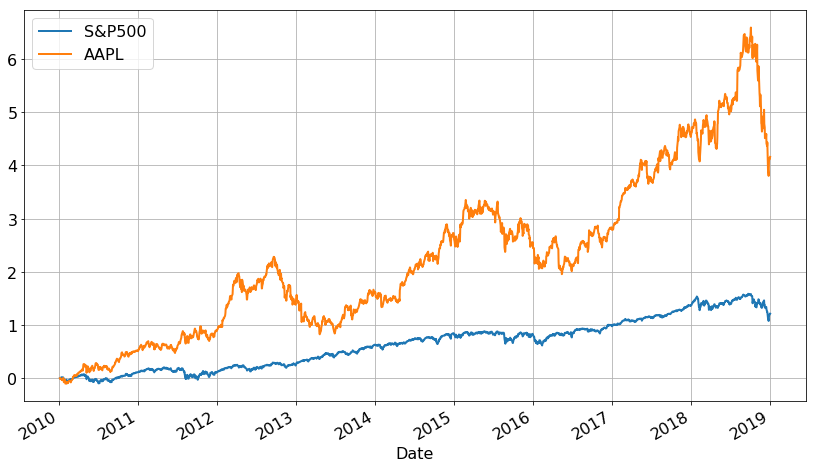

In [45]:
df_plot = pd.DataFrame()

df_plot['S&P500'] = us500['Close']
df_plot['AAPL'] = aapl['Close']

df_plot = df_plot / df_plot.iloc[0] - 1.0
df_plot.plot()

In [46]:
changes = us500['Close'].pct_change()

(changes + 1).product() - 1

1.2125967572529373

In [47]:
changes = aapl['Close'].pct_change()

(changes + 1).product() - 1

4.1599607458292525

## S&P500 전체 종목의 가격

In [48]:
df_price = pd.DataFrame() 

for ix, row in sp500.iterrows():
    sym, name = row['Symbol'], row['Name']
    csv_fn = folder + '%s.csv' % (sym)
    df = pd.read_csv(csv_fn, parse_dates=True, index_col='Date')
    df_price[sym] = df['Close']

In [49]:
df_price.tail(10)

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-17,192.82,69.75,84.93,298.77,151.67,47.08,221.38,18.83,158.84,14.88,...,151.28,104.48,51.73,21.29,87.18,64.30,89.71,107.25,41.19,84.94
2018-12-18,194.56,70.08,83.58,304.80,152.14,47.32,226.18,19.50,158.24,14.98,...,151.93,103.09,51.49,21.07,89.23,64.39,90.10,105.78,40.76,84.99
2018-12-19,189.96,69.00,83.52,296.14,150.96,46.33,224.65,18.16,156.12,14.74,...,151.33,98.39,50.92,20.67,85.22,65.13,90.12,104.56,40.13,83.44
2018-12-20,187.38,68.38,85.37,284.28,143.50,47.05,218.65,17.94,152.50,14.69,...,149.34,97.80,51.37,19.56,83.48,63.86,87.12,101.77,39.74,82.42
2018-12-21,183.75,67.27,84.92,290.29,137.20,45.85,208.80,16.93,151.41,14.45,...,147.07,93.41,50.90,19.33,81.51,63.44,88.14,99.38,39.06,81.68
2018-12-24,178.62,65.56,84.16,281.08,133.67,43.99,205.16,16.65,148.92,13.82,...,146.61,92.01,48.60,18.92,79.27,61.38,87.02,97.23,38.51,79.28
2018-12-26,186.26,69.62,89.04,307.44,139.01,46.42,222.95,17.90,155.03,14.28,...,148.86,99.23,49.56,19.70,85.22,64.27,89.99,102.02,40.51,82.92
2018-12-27,190.70,70.63,89.91,315.67,140.41,47.04,225.14,17.49,154.69,14.29,...,150.85,98.12,49.60,19.68,84.30,65.35,90.96,101.71,40.46,84.33
2018-12-28,189.37,71.09,91.12,318.17,139.82,46.80,223.13,17.82,155.46,14.27,...,150.93,97.24,49.25,19.65,84.34,65.30,91.61,102.65,40.43,84.49


In [50]:
df_price.columns

Index(['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP',
       'AES',
       ...
       'WLTW', 'WYNN', 'XEL', 'XRX', 'XLNX', 'XYL', 'YUM', 'ZBH', 'ZION',
       'ZTS'],
      dtype='object', length=505)

In [51]:
len(df_price.columns)

505

## 2018 수익률 Best, Worst 20
* df.pct_change()
* (df_price['2018'].pct_change() + 1).product() - 1

In [54]:
returns = (df_price['2018'].pct_change() + 1).product() - 1
returns = returns.sort_values(ascending=False)

# Best 20
best20 = returns.head(20)
best20

ABMD    0.688607
AMD     0.681239
FTNT    0.588050
TRIP    0.551337
AAP     0.484212
RHT     0.451091
BSX     0.397943
HCA     0.390347
ORLY    0.381409
MKC     0.375482
EW      0.372737
NRG     0.370242
LLY     0.366556
MRK     0.359125
VRSN    0.354618
KEYS    0.349272
FOXA    0.341885
ILMN    0.338794
RMD     0.331346
NFLX    0.331178
dtype: float64

In [55]:
# Worst 20

worst20 = returns.tail(20)[::-1]
worst20

COTY   -0.670020
MHK    -0.578978
GE     -0.578977
NKTR   -0.571894
LB     -0.571381
PRGO   -0.567956
WDC    -0.545711
IVZ    -0.539477
HAL    -0.528723
AMG    -0.520095
XEC    -0.506997
DISH   -0.502590
IPGP   -0.490465
SLB    -0.481013
FCX    -0.478503
BHF    -0.471476
DVN    -0.466256
UNM    -0.464455
PNR    -0.462053
FBHS   -0.447338
dtype: float64

## 2018 수익률 상위 10
1. ABMD(아비오메드) - 심장 보조장치 기술을 개발 기업
1. AMD(에이엠디) - 그래픽카드, 집적회로 제조사
1. FTNT(포티넷) - 네트워크 보안 장비
1. TRIP(트립어드바이저) - 호텔 등 여행에 관한 가격 비교
1. AAP(어드밴스 오토 파츠) - 자동차 부품, 자동차 애프터 마켓
1. RHT(레드햇) - 리눅스 배포판 제작회
1. BHT(보스턴 사이언티픽) - 의료장비
1. HCA(HCA 홀딩스) - 헬스케어
1. ORLY(오릴리 오토모티브) - 자동차 전장 부품 애프터 마켓
1. MKC(맥코믹 앤 컴퍼니) - 향신료, 조미료 믹스

In [56]:
# Best 10
best10 = returns.head(10)
best10

ABMD    0.688607
AMD     0.681239
FTNT    0.588050
TRIP    0.551337
AAP     0.484212
RHT     0.451091
BSX     0.397943
HCA     0.390347
ORLY    0.381409
MKC     0.375482
dtype: float64

In [57]:
df_price.loc['2018', best10.keys()].head(20)

,ABMD,AMD,FTNT,TRIP,AAP,RHT,BSX,HCA,ORLY,MKC
Date,,,,,,,,,,
2018-01-02,192.49,10.98,44.35,34.77,106.09,121.04,25.28,89.51,249.26,101.23
2018-01-03,195.82,11.55,45.03,34.97,107.05,123.06,25.56,87.04,253.84,101.47
2018-01-04,199.25,12.12,44.00,34.92,111.00,123.98,25.32,85.96,257.68,102.11
2018-01-05,202.32,11.88,44.10,34.73,112.18,124.14,25.97,86.93,260.28,103.11
2018-01-08,207.80,12.28,45.00,34.67,111.39,125.21,25.81,86.75,260.00,103.22
2018-01-09,209.76,11.82,44.32,34.59,110.49,124.15,27.96,86.00,261.26,103.12
2018-01-10,208.14,11.96,44.10,34.49,110.59,124.51,27.52,84.96,258.45,101.58
2018-01-11,210.15,12.14,44.26,35.28,112.95,126.16,27.43,86.97,259.75,101.00
2018-01-12,215.11,12.02,44.94,36.54,115.94,125.95,27.46,88.80,258.60,101.01


In [58]:
import matplotlib as mpl
import numpy as np

def make_colors(n, colormap=plt.cm.Spectral):
    return colormap(np.linspace(0.1, 1.0, n))

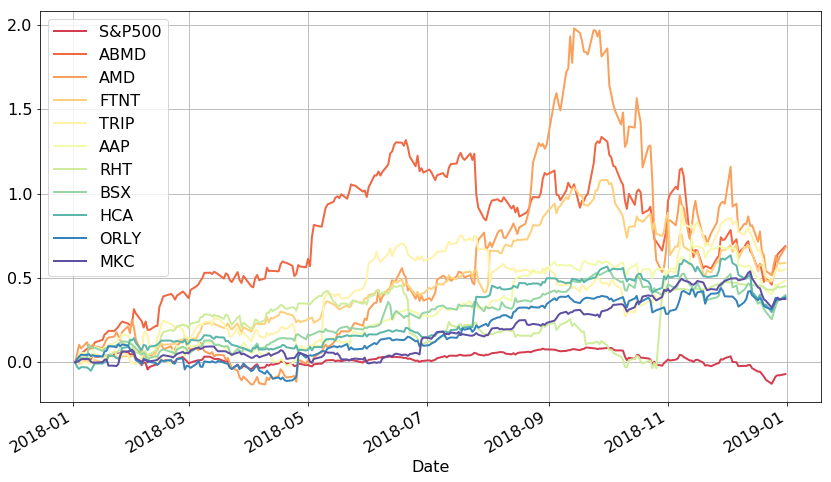

In [59]:
df_plot = pd.DataFrame()

df_plot['S&P500'] = us500.loc['2018', 'Close'] # S&P500 지수
df_plot[best10.keys()] = df_price.loc['2018', best10.keys()] # 10개 종목

df_plot = df_plot / df_plot.iloc[0] - 1
df_plot.plot(color=make_colors(11))

In [60]:
worst10 = returns.tail(10)[::-1]

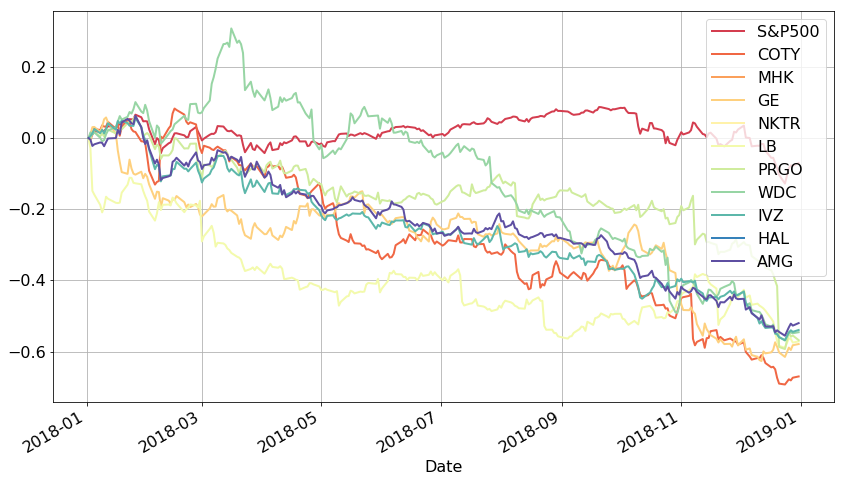

In [61]:
df_plot = pd.DataFrame()

df_plot['S&P500'] = us500.loc['2018', 'Close'] # S&P500 지수
df_plot[worst10.keys()] = df_price.loc['2018', worst10.keys()] # 10개 종목

df_plot = df_plot / df_plot.iloc[0] - 1
df_plot.plot(color=make_colors(11))

## 수익률

In [62]:
df = pd.DataFrame()

df['S&P500'] = us500.loc['2018', 'Close'] # S&P500 지수
df[best20.keys()] = df_price.loc['2018', best20.keys()]

In [63]:
df.head(20)

,S&P500,ABMD,AMD,FTNT,TRIP,AAP,RHT,BSX,HCA,ORLY,...,EW,NRG,LLY,MRK,VRSN,KEYS,FOXA,ILMN,RMD,NFLX
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,2695.81,192.49,10.98,44.35,34.77,106.09,121.04,25.28,89.51,249.26,...,111.58,28.90,84.68,56.22,109.47,NaN,35.86,224.03,85.53,201.07
2018-01-03,2713.06,195.82,11.55,45.03,34.97,107.05,123.06,25.56,87.04,253.84,...,114.59,28.88,85.14,56.14,110.90,NaN,36.54,230.32,86.42,205.05
2018-01-04,2723.99,199.25,12.12,44.00,34.92,111.00,123.98,25.32,85.96,257.68,...,115.41,28.55,85.52,57.05,111.47,NaN,36.82,232.99,86.54,205.63
2018-01-05,2743.15,202.32,11.88,44.10,34.73,112.18,124.14,25.97,86.93,260.28,...,115.86,28.73,86.57,56.99,113.00,NaN,36.75,228.17,87.69,209.99
2018-01-08,2747.71,207.80,12.28,45.00,34.67,111.39,125.21,25.81,86.75,260.00,...,118.14,29.17,86.13,56.66,114.31,NaN,36.24,227.06,88.19,212.05
2018-01-09,2751.29,209.76,11.82,44.32,34.59,110.49,124.15,27.96,86.00,261.26,...,119.51,28.72,86.06,56.80,112.97,NaN,36.54,242.80,88.00,209.31
2018-01-10,2748.23,208.14,11.96,44.10,34.49,110.59,124.51,27.52,84.96,258.45,...,118.50,28.24,86.10,57.30,111.96,NaN,35.60,242.59,87.10,212.52
2018-01-11,2767.56,210.15,12.14,44.26,35.28,112.95,126.16,27.43,86.97,259.75,...,119.99,28.61,86.39,57.60,112.23,NaN,36.20,240.04,87.04,217.24
2018-01-12,2786.24,215.11,12.02,44.94,36.54,115.94,125.95,27.46,88.80,258.60,...,120.83,28.70,86.98,58.66,113.61,NaN,36.73,244.72,87.78,221.23


In [64]:
# 종목간 상관관계
changes = df.pct_change()
corr = changes.corr()
corr.head(10)

,S&P500,ABMD,AMD,FTNT,TRIP,AAP,RHT,BSX,HCA,ORLY,...,EW,NRG,LLY,MRK,VRSN,KEYS,FOXA,ILMN,RMD,NFLX
S&P500,1.000000,0.569708,0.477572,0.571172,0.430621,0.450201,0.202931,0.699311,0.564631,0.500503,...,0.661642,0.490372,0.574360,0.584788,0.576832,0.644592,0.482044,0.734444,0.599565,0.681391
ABMD,0.569708,1.000000,0.428237,0.429916,0.281890,0.259196,0.145950,0.493292,0.314510,0.259567,...,0.632496,0.329429,0.229735,0.289235,0.504020,0.481160,0.257913,0.546543,0.448590,0.523507
AMD,0.477572,0.428237,1.000000,0.383637,0.187769,0.263973,0.091339,0.322902,0.286902,0.325657,...,0.435703,0.215920,0.099704,0.178059,0.362935,0.388697,0.142450,0.392523,0.324464,0.430403
FTNT,0.571172,0.429916,0.383637,1.000000,0.301569,0.262070,0.202513,0.436283,0.375518,0.284094,...,0.521784,0.277399,0.248450,0.228850,0.259941,0.513253,0.255857,0.501135,0.420258,0.523174
TRIP,0.430621,0.281890,0.187769,0.301569,1.000000,0.251901,0.228250,0.297751,0.268466,0.244817,...,0.378045,0.173888,0.130287,0.234424,0.266324,0.333121,0.173183,0.380754,0.189693,0.324871
AAP,0.450201,0.259196,0.263973,0.262070,0.251901,1.000000,0.118441,0.331574,0.245492,0.668117,...,0.283381,0.192488,0.257228,0.248829,0.254443,0.293904,0.245874,0.354309,0.277323,0.306254
RHT,0.202931,0.145950,0.091339,0.202513,0.228250,0.118441,1.000000,0.081357,0.125201,0.164889,...,0.192312,0.152780,0.148520,0.143652,0.128888,0.083055,0.149487,0.200957,0.114885,0.133204
BSX,0.699311,0.493292,0.322902,0.436283,0.297751,0.331574,0.081357,1.000000,0.481570,0.371257,...,0.553720,0.283982,0.367703,0.356973,0.449191,0.504779,0.297581,0.641143,0.489627,0.451209
HCA,0.564631,0.314510,0.286902,0.375518,0.268466,0.245492,0.125201,0.481570,1.000000,0.259018,...,0.404770,0.300124,0.410094,0.383664,0.301925,0.342420,0.250545,0.411010,0.308198,0.350129
ORLY,0.500503,0.259567,0.325657,0.284094,0.244817,0.668117,0.164889,0.371257,0.259018,1.000000,...,0.312227,0.242692,0.310049,0.280794,0.309288,0.323039,0.258077,0.419117,0.295457,0.270384


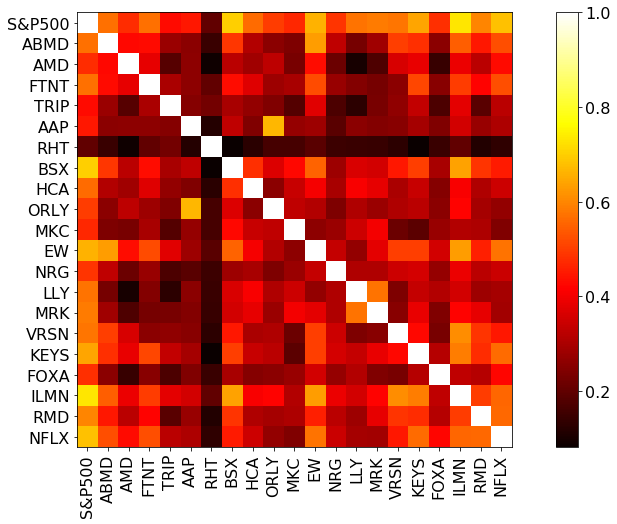

In [65]:
# 상관관계 히트맵

plt.figure(figsize=(16,8))
plt.grid(False)
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.show()

In [66]:
# 상관계수 순위 만들기 (수익률 상위 20종목)
import pandas as pd

idx, vals = [], []
for ix, i in enumerate(corr.columns.values):
    for j in corr.columns.values[ix + 1:]:
        idx.append((i, j))
        vals.append(corr[i][j])

ser = pd.Series(data=vals, index=idx)
ser_ord = ser.sort_values(ascending=False)
ser_ord[:20]

(S&P500, ILMN)    0.734444
(S&P500, BSX)     0.699311
(S&P500, NFLX)    0.681391
(AAP, ORLY)       0.668117
(S&P500, EW)      0.661642
(S&P500, KEYS)    0.644592
(BSX, ILMN)       0.641143
(ABMD, EW)        0.632496
(EW, ILMN)        0.631954
(VRSN, ILMN)      0.609666
(S&P500, RMD)     0.599565
(KEYS, ILMN)      0.588009
(S&P500, MRK)     0.584788
(S&P500, VRSN)    0.576832
(S&P500, LLY)     0.574360
(LLY, MRK)        0.573635
(EW, NFLX)        0.573321
(S&P500, FTNT)    0.571172
(S&P500, ABMD)    0.569708
(KEYS, NFLX)      0.564949
dtype: float64

In [67]:
# 지수와 상관관계
changes = df.pct_change()
corr = changes.corr()
corr['S&P500'].sort_values(ascending=False)[1:]

ILMN    0.734444
BSX     0.699311
NFLX    0.681391
EW      0.661642
KEYS    0.644592
RMD     0.599565
MRK     0.584788
VRSN    0.576832
LLY     0.574360
FTNT    0.571172
ABMD    0.569708
HCA     0.564631
ORLY    0.500503
NRG     0.490372
FOXA    0.482044
AMD     0.477572
MKC     0.471124
AAP     0.450201
TRIP    0.430621
RHT     0.202931
Name: S&P500, dtype: float64

## 스캐터 차트, 수익과 위험 분석
* 수익 (returns): 수익률 평균 (mean)
* 위험 (risk): 표준편차 (std)

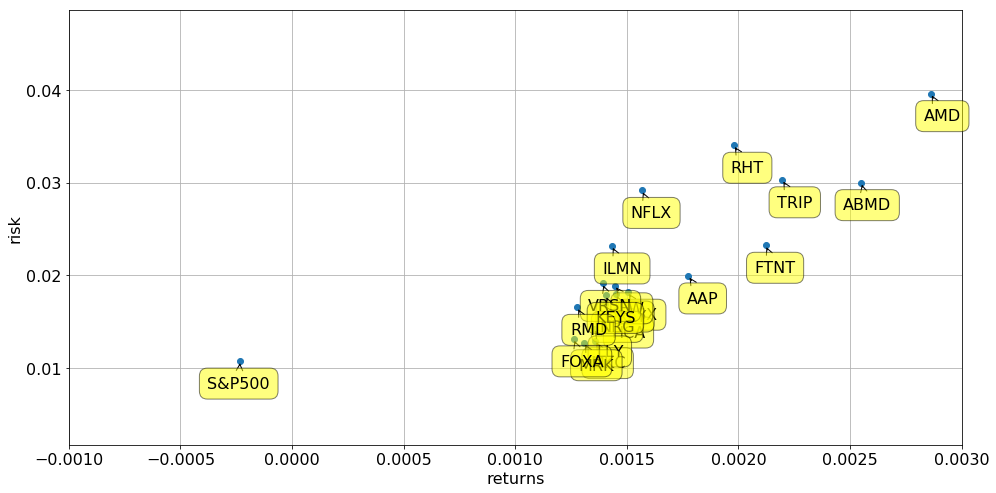

In [68]:
plt.figure(figsize=(16,8))
plt.scatter(changes.mean(), changes.std())
plt.xlabel('returns')
plt.ylabel('risk')
plt.xlim(-0.001, 0.003)
for label, x, y in zip(changes.columns, changes.mean(), changes.std()):
    plt.annotate( label, xy=(x, y), xytext=(30, -30),
    textcoords = 'offset points',
    ha = 'right', va = 'bottom',
    bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))   

## 전체 종목에서 2018년 수익률 상관관계 상위 종목

In [69]:
df = pd.DataFrame()

df['S&P500'] = us500.loc['2018', 'Close'] # S&P500 지수
df[df_price.columns] = df_price.loc['2018', df_price.columns]

# 종목간 상관관계
changes = df.pct_change()
corr = changes.corr()

idx, vals = [], []
for ix, i in enumerate(corr.columns.values):
    for j in corr.columns.values[ix + 1:]:
        idx.append((i, j))
        vals.append(corr[i][j])

ser = pd.Series(data=vals, index=idx)
ser_ord = ser.sort_values(ascending=False)
ser_ord[:40]

(GOOGL, GOOG)     0.993665
(FOXA, FOX)       0.988195
(DISCA, DISCK)    0.985300
(UAA, UA)         0.977586
(NWSA, NWS)       0.972784
(BAC, JPM)        0.930777
(AVB, UDR)        0.928910
(CMS, WEC)        0.927522
(WEC, XEL)        0.921569
(MAA, UDR)        0.919998
(CMS, XEL)        0.919797
(AEP, XEL)        0.917240
(EQR, UDR)        0.914252
(MA, V)           0.913769
(LNT, XEL)        0.912091
(AIV, UDR)        0.912072
(LNT, WEC)        0.911992
(AVB, MAA)        0.910552
(AVB, EQR)        0.910551
(CMS, DTE)        0.906648
(LNT, AEP)        0.904028
(LNT, CMS)        0.901618
(AEE, CMS)        0.901259
(LNC, PRU)        0.899293
(AEP, CMS)        0.897136
(LNT, AEE)        0.896079
(AEE, WEC)        0.895750
(ED, WEC)         0.894669
(AIV, MAA)        0.893404
(HBAN, KEY)       0.891844
(AIV, AVB)        0.891155
(AEP, DTE)        0.889822
(CMA, KEY)        0.889040
(DTE, XEL)        0.888458
(CMS, ED)         0.887810
(HBAN, RF)        0.887089
(AEE, XEL)        0.886097
(

## 상관계수가 높은 페어 종목

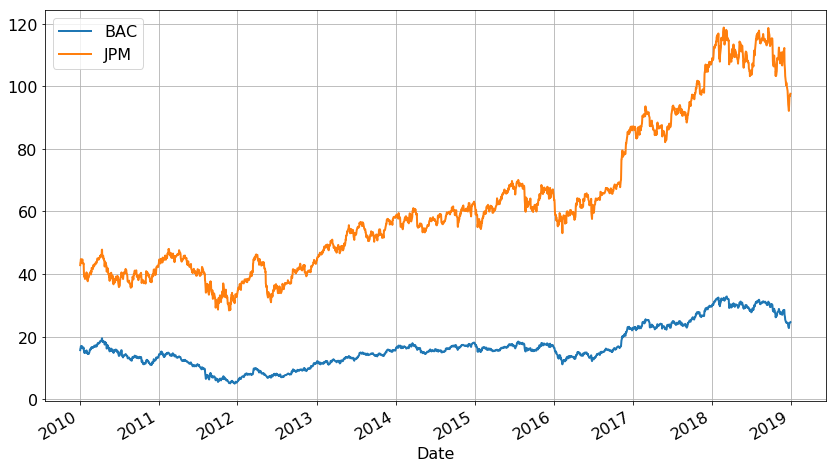

In [79]:
df_price[['BAC', 'JPM']].plot()

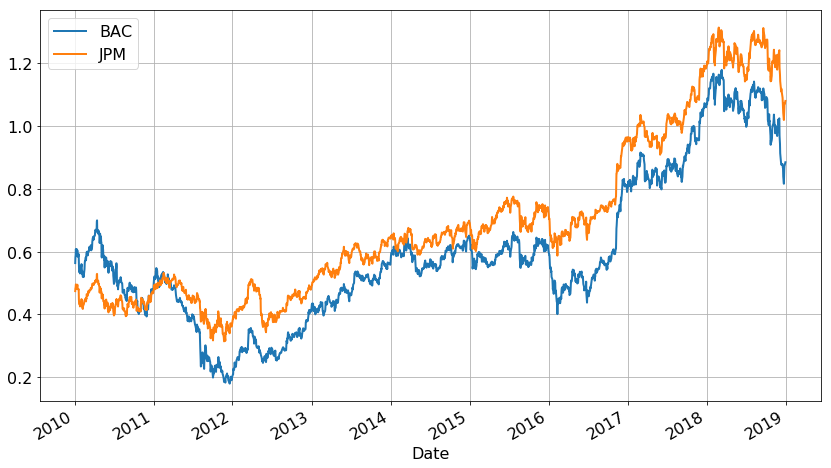

In [86]:
df_plot = df_price[['BAC', 'JPM']]
df_plot = df_plot / (df_plot.max() - df_plot.min())
df_plot.plot()

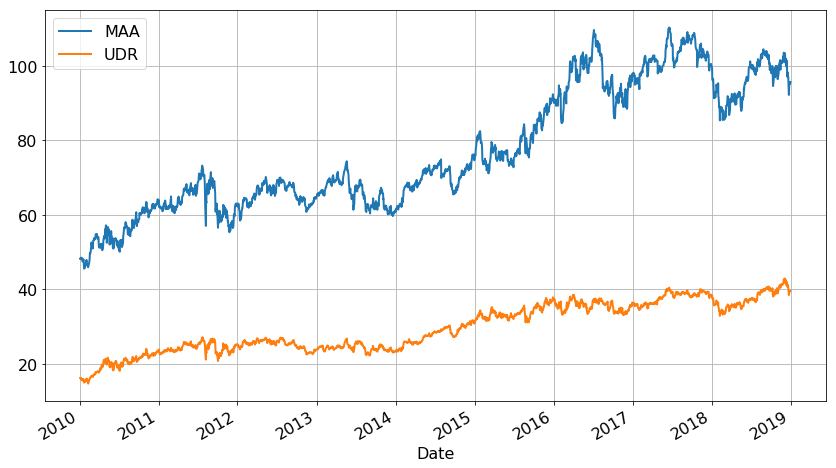

In [83]:
df_price[['MAA', 'UDR']].plot()

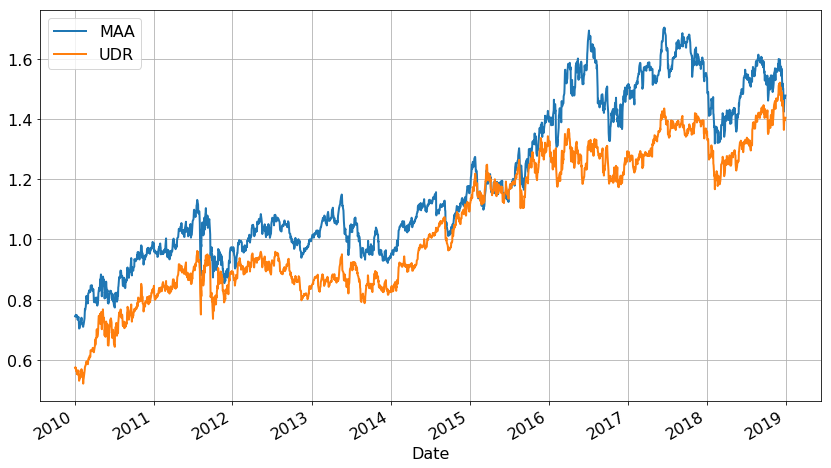

In [87]:
df_plot = df_price[['MAA', 'UDR']]
df_plot = df_plot / (df_plot.max() - df_plot.min())
df_plot.plot()

###  2019 FinanceData.KR